공유 레이어를 사용하여 <br>
hA = sigmoid( a * xA + b ) <br>
hB = sigmoid( a * xB + b ) <br>
y = c * hA * hB + d <br>
관계를 만족시키는 데이터에서 a, b, c, d 를 발견해 봅시다. 초기 웨이트에 따라서 학습이 잘 않될 수도 있으므로 여러번 실행해 봅시다.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           shared[0][0]                 

800/800 [==============================] - 0s 262us/sample - loss: 7.9312e-04 - val_loss: 8.4511e-04
Epoch 62/200
800/800 [==============================] - 0s 243us/sample - loss: 7.8690e-04 - val_loss: 8.3480e-04
Epoch 63/200
800/800 [==============================] - 0s 244us/sample - loss: 7.7790e-04 - val_loss: 8.2697e-04
Epoch 64/200
800/800 [==============================] - 0s 243us/sample - loss: 7.6964e-04 - val_loss: 8.2255e-04
Epoch 65/200
800/800 [==============================] - 0s 254us/sample - loss: 7.6318e-04 - val_loss: 8.2603e-04
Epoch 66/200
800/800 [==============================] - 0s 252us/sample - loss: 7.5667e-04 - val_loss: 8.0231e-04
Epoch 67/200
800/800 [==============================] - 0s 244us/sample - loss: 7.4776e-04 - val_loss: 7.9906e-04
Epoch 68/200
800/800 [==============================] - 0s 247us/sample - loss: 7.4081e-04 - val_loss: 7.8594e-04
Epoch 69/200
800/800 [==============================] - 0s 251us/sample - loss: 7.3393e-04 - val_loss

800/800 [==============================] - 0s 253us/sample - loss: 5.0520e-05 - val_loss: 5.1313e-05
Epoch 133/200
800/800 [==============================] - 0s 242us/sample - loss: 4.4890e-05 - val_loss: 4.5601e-05
Epoch 134/200
800/800 [==============================] - 0s 249us/sample - loss: 3.9365e-05 - val_loss: 3.8662e-05
Epoch 135/200
800/800 [==============================] - 0s 248us/sample - loss: 3.5088e-05 - val_loss: 3.4016e-05
Epoch 136/200
800/800 [==============================] - 0s 262us/sample - loss: 3.0175e-05 - val_loss: 2.9718e-05
Epoch 137/200
800/800 [==============================] - 0s 248us/sample - loss: 2.6134e-05 - val_loss: 2.7104e-05
Epoch 138/200
800/800 [==============================] - 0s 246us/sample - loss: 2.3526e-05 - val_loss: 2.3144e-05
Epoch 139/200
800/800 [==============================] - 0s 263us/sample - loss: 1.9592e-05 - val_loss: 1.8985e-05
Epoch 140/200
800/800 [==============================] - 0s 253us/sample - loss: 1.6680e-05 - 

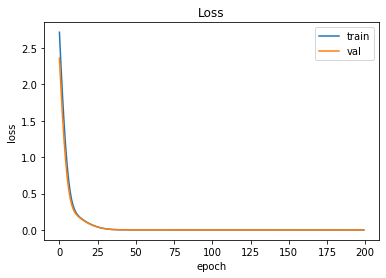

shared_weights
 [array([[1.9999995]], dtype=float32), array([0.9999998], dtype=float32)] 

y_weights
 [array([[1.9999999]], dtype=float32), array([1.], dtype=float32)]


In [1]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2; b = 1; c = 2; d = 1

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train = c * sigmoid(a * x_train_A + b) * sigmoid(a * x_train_B + b) + d

shared_layer = layers.Dense(1, activation='sigmoid', name='shared')

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
sA = shared_layer(xA)
sB = shared_layer(xB)
mul = layers.Multiply(name='mul')([sA, sB])
y = layers.Dense(1, name='y')(mul)

model = models.Model([xA, xB], y)
model.summary()

model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train,
                 batch_size=8, epochs=200, validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

shared_weights = model.get_layer('shared').get_weights()
y_weights = model.get_layer('y').get_weights()
print('shared_weights\n', shared_weights, '\n')
print('y_weights\n', y_weights)